In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator

In [3]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
df1 = df[['Total', 'Rating']]

In [9]:
df1.head()

,Total,Rating
0,548.9715,9.1
1,80.2200,9.6
2,340.5255,7.4
3,489.0480,8.4
4,634.3785,5.3


# K-Means Clustering

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1=scaler.fit_transform(df1)
    

In [11]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,15):
    km = KMeans(n_clusters=i, n_init='auto')
    km.fit_predict(df1)
    wcss.append(km.inertia_)

In [12]:
kn = KneeLocator(
    range(1,15),
    wcss,
    curve='convex',
    direction='decreasing',
    interp_method='interp1d',
)

print('Elbow point:-',kn.knee)

Elbow point:- 5


In [13]:
'''The output of the above code segment fluctuates between 4 and 5. To arrive at a decision, we have to compare the    scores of the three metrics '''

'The output of the above code segment fluctuates between 4 and 5. To arrive at a decision, we have to compare the    scores of the three metrics '

Text(6, 523.5211666923842, 'Elbow point')

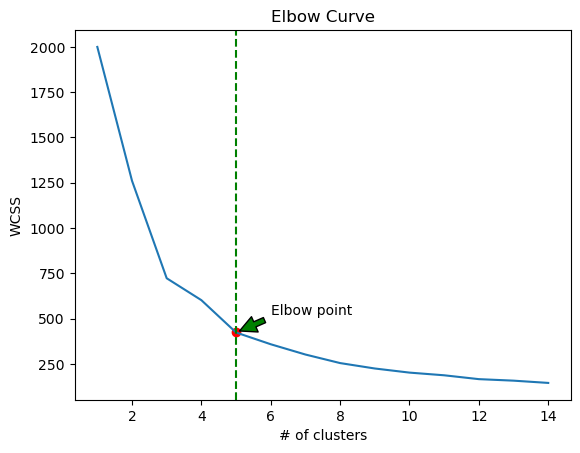

In [14]:
plt.xlabel('# of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.plot(range(1,15), wcss)
elbow_point = 5
plt.scatter(elbow_point, wcss[elbow_point - 1], color='red', label='Elbow point')
plt.axvline(x=5, color='green', linestyle='--')
plt.annotate('Elbow point', xy=(elbow_point, wcss[elbow_point - 1]), xytext=(elbow_point + 1, wcss[elbow_point - 1] + 100),
             arrowprops=dict(facecolor='green', shrink=0.1))

<Axes: xlabel='Total', ylabel='Rating'>

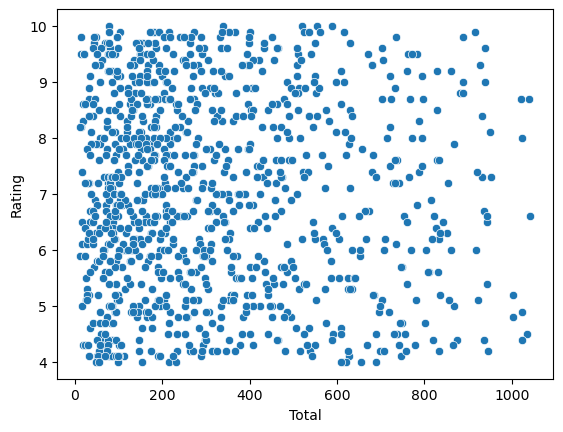

In [15]:
sns.scatterplot(df,x='Total', y='Rating' )

In [16]:
km =KMeans(n_clusters=5, n_init=30, max_iter=300)
y_means = km.fit_predict(df1)

In [17]:
df1[y_means==0]

array([[-1.06668388, -1.43952382],
       [-0.96978539, -1.4977405 ],
       [-0.18647993, -1.09022375],
       [-1.03045376, -1.4977405 ],
       [-0.48888181, -1.09022375],
       [-0.54472234, -1.67239054],
       [-0.93526424, -0.682707  ],
       [-0.6361094 , -0.682707  ],
       [-1.23582898, -1.55595718],
       [-0.692249  , -1.73060722],
       [-0.54472234, -0.74092368],
       [-1.13269277, -0.74092368],
       [-0.65678791, -1.09022375],
       [-0.99499267, -1.67239054],
       [-1.10603286, -1.67239054],
       [-0.4270599 , -1.20665711],
       [-0.00755099, -1.61417386],
       [-1.17323803, -1.38130715],
       [-0.84545798, -0.97379039],
       [-1.09471095, -1.03200707],
       [-0.8575062 , -1.67239054],
       [-0.18383103, -0.79914035],
       [-0.20468044, -1.20665711],
       [ 0.25024683, -1.26487379],
       [ 0.14087288, -0.79914035],
       [ 0.18141814, -0.85735703],
       [-0.64093724, -1.26487379],
       [-0.14144863, -0.74092368],
       [-0.68592582,

Text(0, 0.5, 'Rating')

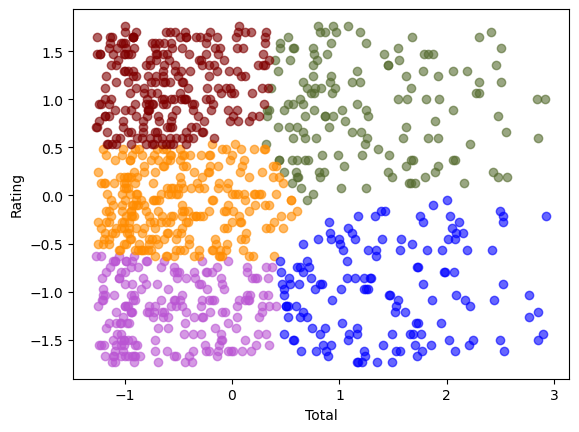

In [18]:
plt.scatter(df1[y_means==0,0],df1[y_means==0,1], color='mediumorchid', alpha=0.6)
plt.scatter(df1[y_means==1,0],df1[y_means==1,1], color='darkolivegreen', alpha=0.6)
plt.scatter(df1[y_means==2,0],df1[y_means==2,1], color='darkorange', alpha=0.6)
plt.scatter(df1[y_means==3,0],df1[y_means==3,1], color='blue', alpha=0.6)
plt.scatter(df1[y_means==4,0],df1[y_means==4,1], color='maroon', alpha=0.6)

plt.xlabel('Total')
plt.ylabel('Rating')

In [19]:
# silhouette score would always lie between -1 to 1.
# where higher values indicate a better clustering. Ideally , S(i) = 1. S(i) < 0 indicates outliers
# A score near 0 signifies overlapping clusters.

In [20]:
# davies_bouldin_score:- The minimum score is 0, with lower values indicating better clustering.

In [21]:
# A higher Calinski−Harabasz Index suggests better clustering performance, with higher separation 
# between clusters and lower variance within clusters.

In [22]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
for i in range(2,8):
    print('For # of clusters = {}'.format(i))
    km = KMeans(n_clusters=i, n_init=30, max_iter=300)
    y_means = km.fit_predict(df1)
    labels = km.labels_
    silhouette = silhouette_score(df1,labels,metric='euclidean')
    print('ss:',silhouette)
    dbs = davies_bouldin_score(df1,labels)
    print('dbs:',dbs)
    chs = calinski_harabasz_score(df1,labels)
    print('chs:',chs)
    print('\n')

For # of clusters = 2
ss: 0.3609661894392592
dbs: 1.1595764149952934
chs: 586.38004368628


For # of clusters = 3
ss: 0.4149867075038597
dbs: 0.8150411859032043
chs: 880.5091044603844


For # of clusters = 4
ss: 0.41828183129079843
dbs: 0.79540661348768
chs: 933.2662579107147


For # of clusters = 5
ss: 0.3755791920902427
dbs: 0.8761666303616197
chs: 926.6294644694408


For # of clusters = 6
ss: 0.3747152364155784
dbs: 0.8724846888757266
chs: 923.5033780317425


For # of clusters = 7
ss: 0.37354574317626704
dbs: 0.8249189333918983
chs: 952.4021931834924




In [23]:
# By evaluating the performance of clustering using 3 metrics: # of clusters = 4 gives better clustering.

Text(5, 701.9817270182791, 'Elbow point')

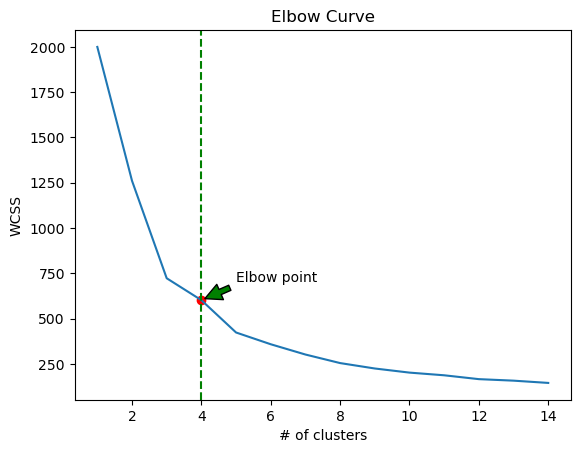

In [24]:
plt.xlabel('# of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.plot(range(1,15), wcss)
elbow_point = 4
plt.scatter(elbow_point, wcss[elbow_point - 1], color='red', label='Elbow point')
plt.axvline(x=4, color='green', linestyle='--')
plt.annotate('Elbow point', xy=(elbow_point, wcss[elbow_point - 1]), xytext=(elbow_point + 1, wcss[elbow_point - 1] + 100),
             arrowprops=dict(facecolor='green', shrink=0.1))

In [25]:
km1 =KMeans(n_clusters=4, n_init=30, max_iter=300)
y_means_1 = km1.fit_predict(df1)

Text(0, 0.5, 'Rating')

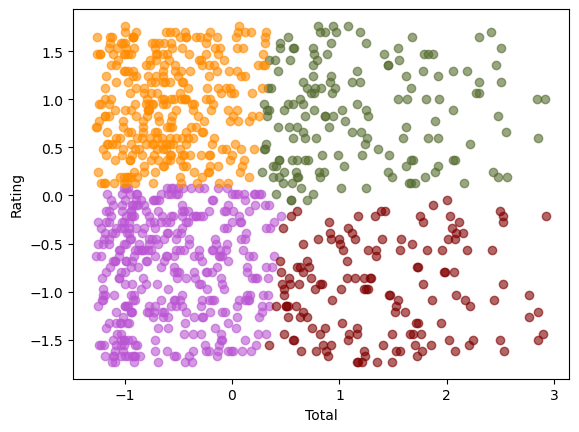

In [26]:
plt.scatter(df1[y_means_1==0,0],df1[y_means_1==0,1], color='mediumorchid', alpha=0.6)
plt.scatter(df1[y_means_1==1,0],df1[y_means_1==1,1], color='darkolivegreen', alpha=0.6)
plt.scatter(df1[y_means_1==2,0],df1[y_means_1==2,1], color='darkorange', alpha=0.6)
plt.scatter(df1[y_means_1==3,0],df1[y_means_1==3,1], color='maroon', alpha=0.6)

plt.xlabel('Total')
plt.ylabel('Rating')

In [27]:
df[y_means_1==0].select_dtypes('object').describe().drop(['Invoice ID', 'Date','Time'], axis=1)

,Branch,City,Customer type,Gender,Product line,Payment
count,378,378,378,378,378,378
unique,3,3,2,2,6,3
top,B,Mandalay,Normal,Male,Fashion accessories,Cash
freq,141,141,192,200,74,136


In [28]:
df[y_means_1==0][['Product line']].value_counts()

Product line          
Fashion accessories       74
Sports and travel         67
Electronic accessories    64
Food and beverages        60
Home and lifestyle        59
Health and beauty         54
Name: count, dtype: int64

In [29]:
df[y_means_1==0].describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,378.000000,378.000000,378.000000,378.000000,378.000000,3.780000e+02,378.000000,378.000000
mean,46.417804,4.378307,8.807685,184.961389,176.153704,4.761905e+00,8.807685,5.682275
std,24.370489,2.677593,5.351477,112.381013,107.029537,2.490196e-14,5.351477,0.926119
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,25.465000,2.000000,4.111500,86.341500,82.230000,4.761905e+00,4.111500,4.900000
50%,43.260000,4.000000,8.181500,171.811500,163.630000,4.761905e+00,8.181500,5.800000
75%,63.012500,6.000000,13.220250,277.625250,264.405000,4.761905e+00,13.220250,6.500000
max,99.890000,10.000000,20.720000,435.120000,414.400000,4.761905e+00,20.720000,7.100000


In [30]:
df[y_means_1==1].select_dtypes('object').describe().drop(['Invoice ID', 'Date','Time'], axis=1)

,Branch,City,Customer type,Gender,Product line,Payment
count,163,163,163,163,163,163
unique,3,3,2,2,6,3
top,C,Naypyitaw,Member,Female,Sports and travel,Ewallet
freq,58,58,84,86,30,57


In [31]:
df[y_means_1==2].select_dtypes('object').describe().drop(['Invoice ID', 'Date','Time'], axis=1)

,Branch,City,Customer type,Gender,Product line,Payment
count,310,310,310,310,310,310
unique,3,3,2,2,6,3
top,A,Yangon,Normal,Female,Food and beverages,Credit card
freq,116,116,157,158,63,105


In [32]:
df[y_means_1==3].select_dtypes('object').describe().drop(['Invoice ID', 'Date','Time'], axis=1)

,Branch,City,Customer type,Gender,Product line,Payment
count,149,149,149,149,149,149
unique,3,3,2,2,6,3
top,C,Naypyitaw,Member,Female,Electronic accessories,Ewallet
freq,52,52,78,79,30,52


# Customer Segmentation based on columns:- 'Gender', 'Day', 'Product line', 'Customer type' and 'gross income'

In [33]:
df['Date'] = pd.to_datetime(df['Date'])

In [34]:
df['Day']=df['Date'].dt.day_name()

In [35]:
df3 = df[['Gender','Day','Product line','Customer type','gross income']]
df3.head()

,Gender,Day,Product line,Customer type,gross income
0,Female,Saturday,Health and beauty,Member,26.1415
1,Female,Friday,Electronic accessories,Normal,3.8200
2,Male,Sunday,Home and lifestyle,Normal,16.2155
3,Male,Sunday,Health and beauty,Member,23.2880
4,Male,Friday,Sports and travel,Normal,30.2085


In [36]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df3['Gender'] = le.fit_transform(df3['Gender'])
df3['Day'] = le.fit_transform(df3['Day'])
df3['Product line'] = le.fit_transform(df3['Product line'])
df3['Customer type'] = le.fit_transform(df3['Customer type'])

/var/folders/c1/8l1jhvm55bx9z1b8z7z281dr0000gn/T/ipykernel_39262/1682652967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Gender'] = le.fit_transform(df3['Gender'])
/var/folders/c1/8l1jhvm55bx9z1b8z7z281dr0000gn/T/ipykernel_39262/1682652967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Day'] = le.fit_transform(df3['Day'])
/var/folders/c1/8l1jhvm55bx9z1b8z7z281dr0000gn/T/ipykernel_39262/1682652967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [37]:
df3.sample(2)

,Gender,Day,Product line,Customer type,gross income
980,1,2,2,0,11.918
365,0,3,1,1,16.336


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3 = scaler.fit_transform(df3)
df3

array([[0.        , 0.33333333, 0.6       , 0.        , 0.52161615],
       [0.        , 0.        , 0.        , 1.        , 0.06738704],
       [1.        , 0.5       , 0.8       , 1.        , 0.31962801],
       ...,
       [1.        , 0.33333333, 0.4       , 0.        , 0.02204857],
       [1.        , 0.        , 0.8       , 1.        , 0.0566222 ],
       [0.        , 0.16666667, 0.2       , 0.        , 0.6188354 ]])

In [39]:
from sklearn.cluster import KMeans
km =KMeans(n_clusters=4, n_init=30, max_iter=300)
y_means_2 = km.fit_predict(df3)

In [40]:
df3[y_means==2,1]

array([0.33333333, 0.5       , 0.5       , 0.66666667, 0.        ,
       0.        , 1.        , 0.33333333, 0.33333333, 1.        ,
       0.5       , 0.66666667, 0.16666667, 0.33333333, 1.        ,
       0.33333333, 0.16666667, 1.        , 0.33333333, 0.83333333,
       0.83333333, 0.66666667, 0.        , 0.83333333, 0.        ,
       0.33333333, 0.83333333, 1.        , 0.5       , 0.33333333,
       0.33333333, 0.16666667, 0.5       , 1.        , 1.        ,
       0.33333333, 0.        , 0.33333333, 0.33333333, 0.66666667,
       1.        , 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.5       , 0.5       , 1.        , 1.        , 0.83333333,
       0.83333333, 0.83333333, 0.        , 1.        , 0.66666667,
       0.16666667, 0.        , 0.16666667, 0.5       , 0.66666667,
       0.33333333, 1.        , 0.        , 0.16666667, 1.        ,
       0.5       , 0.33333333, 0.33333333, 0.        , 0.16666667,
       0.5       , 0.5       , 0.33333333, 0.33333333, 0.66666

In [41]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

labels = km.labels_
silhouette = silhouette_score(df3,labels,metric='euclidean')
print(silhouette)

0.43660677818621


In [42]:
dbs = davies_bouldin_score(df3,labels)
print(dbs)

1.016305249037374


In [43]:
chs = calinski_harabasz_score(df3,labels)
print(chs)

588.2067741409086


In [44]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
for i in range(2,8):
    print('For # of clusters = {}'.format(i))
    km = KMeans(n_clusters=i, n_init=30, max_iter=300)
    y_means = km.fit_predict(df3)
    labels = km.labels_
    silhouette = silhouette_score(df3,labels,metric='euclidean')
    print('silhouette_score:', silhouette)
    dbs = davies_bouldin_score(df3,labels)
    print('davies_bouldin_score',dbs)
    chs = calinski_harabasz_score(df3,labels)
    print('calinski_harabasz_score',chs)
    print('\n')

For # of clusters = 2
silhouette_score: 0.3171325547243796
davies_bouldin_score 1.4427308352210768
calinski_harabasz_score 469.2199473798906


For # of clusters = 3
silhouette_score: 0.3294480494404588
davies_bouldin_score 1.1004986874253586
calinski_harabasz_score 459.85422619204365


For # of clusters = 4
silhouette_score: 0.43660677818621
davies_bouldin_score 1.0163052490373743
calinski_harabasz_score 588.2067741409086


For # of clusters = 5
silhouette_score: 0.39015399897274766
davies_bouldin_score 1.1401893274912247
calinski_harabasz_score 507.7151045545917


For # of clusters = 6
silhouette_score: 0.3534071665602636
davies_bouldin_score 1.2113391293354774
calinski_harabasz_score 467.70169494490386


For # of clusters = 7
silhouette_score: 0.33291350060444386
davies_bouldin_score 1.2723172932581952
calinski_harabasz_score 449.39023451146744




In [45]:
ch=[]
for i in range(2,8):
    km = KMeans(n_clusters=i, n_init=30, max_iter=300)
    y_means = km.fit_predict(df3)
    labels = km.labels_
    chs = calinski_harabasz_score(df3,labels)
    ch.append(chs)
print(ch)   

[469.2199473798906, 459.85422619204365, 588.2067741409086, 507.9394443346008, 467.9992875606051, 448.62332583238117]


Text(0, 0.5, 'CHS values')

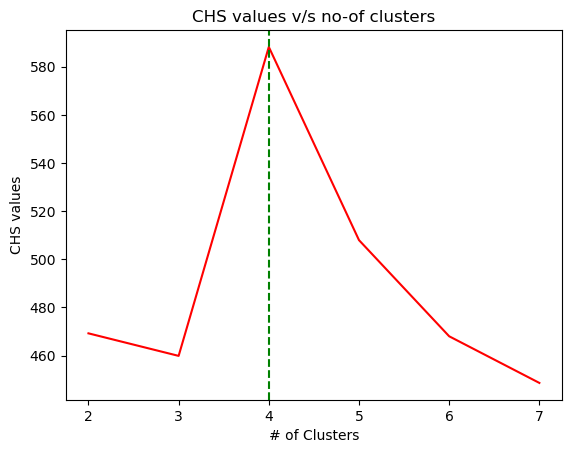

In [46]:
plt.plot(range(2,8), ch, c='red')
plt.axvline(x=4, color='green', linestyle='--')
plt.title('CHS values v/s no-of clusters')
plt.xlabel('# of Clusters')
plt.ylabel('CHS values')

In [47]:
'''Higher value of CH index means the clusters are dense and well separated, although there is no “acceptable” cut-off value. We need to choose that solution which gives a peak or at least an abrupt elbow on the line plot of CH indices. On the other hand, if the line is smooth (horizontal or ascending or descending) then there is no such reason to prefer one solution over others.'''

'Higher value of CH index means the clusters are dense and well separated, although there is no “acceptable” cut-off value. We need to choose that solution which gives a peak or at least an abrupt elbow on the line plot of CH indices. On the other hand, if the line is smooth (horizontal or ascending or descending) then there is no such reason to prefer one solution over others.'

In [48]:
df[y_means_2==0].select_dtypes('object').describe().drop(columns=['Invoice ID','Time'])

,Branch,City,Customer type,Gender,Product line,Payment,Day
count,259,259,259,259,259,259,259
unique,3,3,1,1,6,3,7
top,A,Yangon,Normal,Male,Home and lifestyle,Ewallet,Friday
freq,92,92,259,259,45,105,49


In [49]:
df[y_means_2==1].select_dtypes('object').describe().drop(columns=['Invoice ID','Time'])

,Branch,City,Customer type,Gender,Product line,Payment,Day
count,240,240,240,240,240,240,240
unique,3,3,1,1,6,3,7
top,C,Naypyitaw,Normal,Female,Electronic accessories,Cash,Saturday
freq,82,82,240,240,49,88,45


In [50]:
df[y_means_2==2].select_dtypes('object').describe().drop(columns=['Invoice ID','Time'])

,Branch,City,Customer type,Gender,Product line,Payment,Day
count,261,261,261,261,261,261,261
unique,3,3,1,1,6,3,7
top,C,Naypyitaw,Member,Female,Food and beverages,Credit card,Tuesday
freq,96,96,261,261,51,90,54


In [51]:
df[y_means_2==3].select_dtypes('object').describe().drop(columns=['Invoice ID','Time'])

,Branch,City,Customer type,Gender,Product line,Payment,Day
count,240,240,240,240,240,240,240
unique,3,3,1,1,6,3,7
top,A,Yangon,Member,Male,Health and beauty,Credit card,Wednesday
freq,87,87,240,240,43,82,43
